In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt

from CustomAlgorithm import *

In [2]:
df = pd.read_csv("out.csv")
df.sort_values(["length"])
df

,Unnamed: 0,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count
0,0,/run/media/mateusz/Seagate Expansion Drive/201...,27,47,1756,504,1916,519,159.530561,21
1,1,/run/media/mateusz/Seagate Expansion Drive/201...,30,39,1042,995,1054,1046,50.960769,10
2,2,/run/media/mateusz/Seagate Expansion Drive/201...,217,228,1440,547,1492,601,74.966659,12
3,3,/run/media/mateusz/Seagate Expansion Drive/201...,109,137,1194,784,1320,786,124.004032,27
4,4,/run/media/mateusz/Seagate Expansion Drive/201...,295,309,279,896,304,977,83.815273,15
5,5,/run/media/mateusz/Seagate Expansion Drive/201...,4,348,1181,875,1242,912,69.115845,831
6,6,/run/media/mateusz/Seagate Expansion Drive/201...,6,348,1206,863,1248,896,33.837849,684
7,7,/run/media/mateusz/Seagate Expansion Drive/201...,223,348,1246,850,1270,865,26.076810,126
8,8,/run/media/mateusz/Seagate Expansion Drive/201...,268,348,1246,850,1270,865,28.017851,79


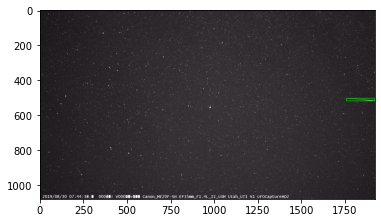

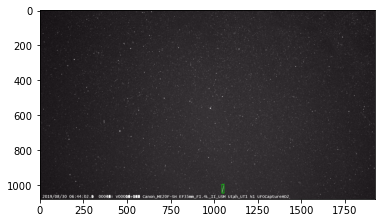

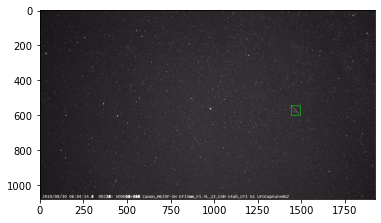

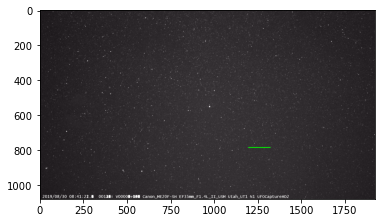

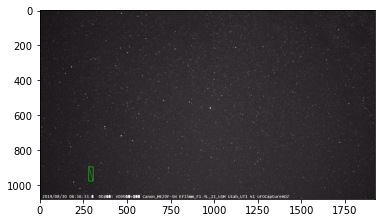

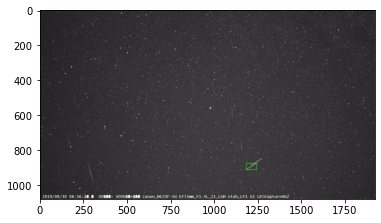

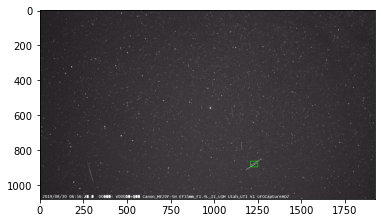

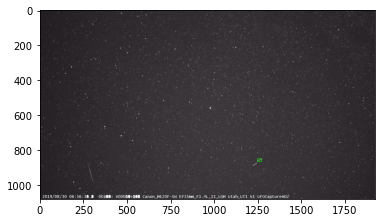

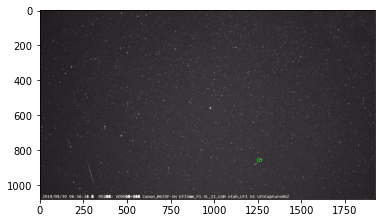

In [6]:
%matplotlib inline 
for row in range(len(df)):
    show_trigger(TriggerInfo.from_csv_row(df.iloc[row]))